## 2-DecisionTree

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# dataset load
train = pd.read_csv('./data/train.csv')
train.head(1)\

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [5]:
test = pd.read_csv('./data/test.csv')
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.dtypes[train.dtypes != 'int']

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Pre-Processing

### handling na : Age

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train['Age'].describe() # filling na w/ median value

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
train['Age'].median()

28.0

In [11]:
train['Age_median'] = train['Age']
train['Age_median'].fillna(train['Age'].median(), inplace=True) 

In [12]:
test['Age_median'] = test['Age']
test['Age_median'].fillna(test['Age'].median(), inplace=True)

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_median       0
dtype: int64

In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Age_median       0
dtype: int64

In [15]:
#%pip install missingno

In [16]:
import missingno as msno

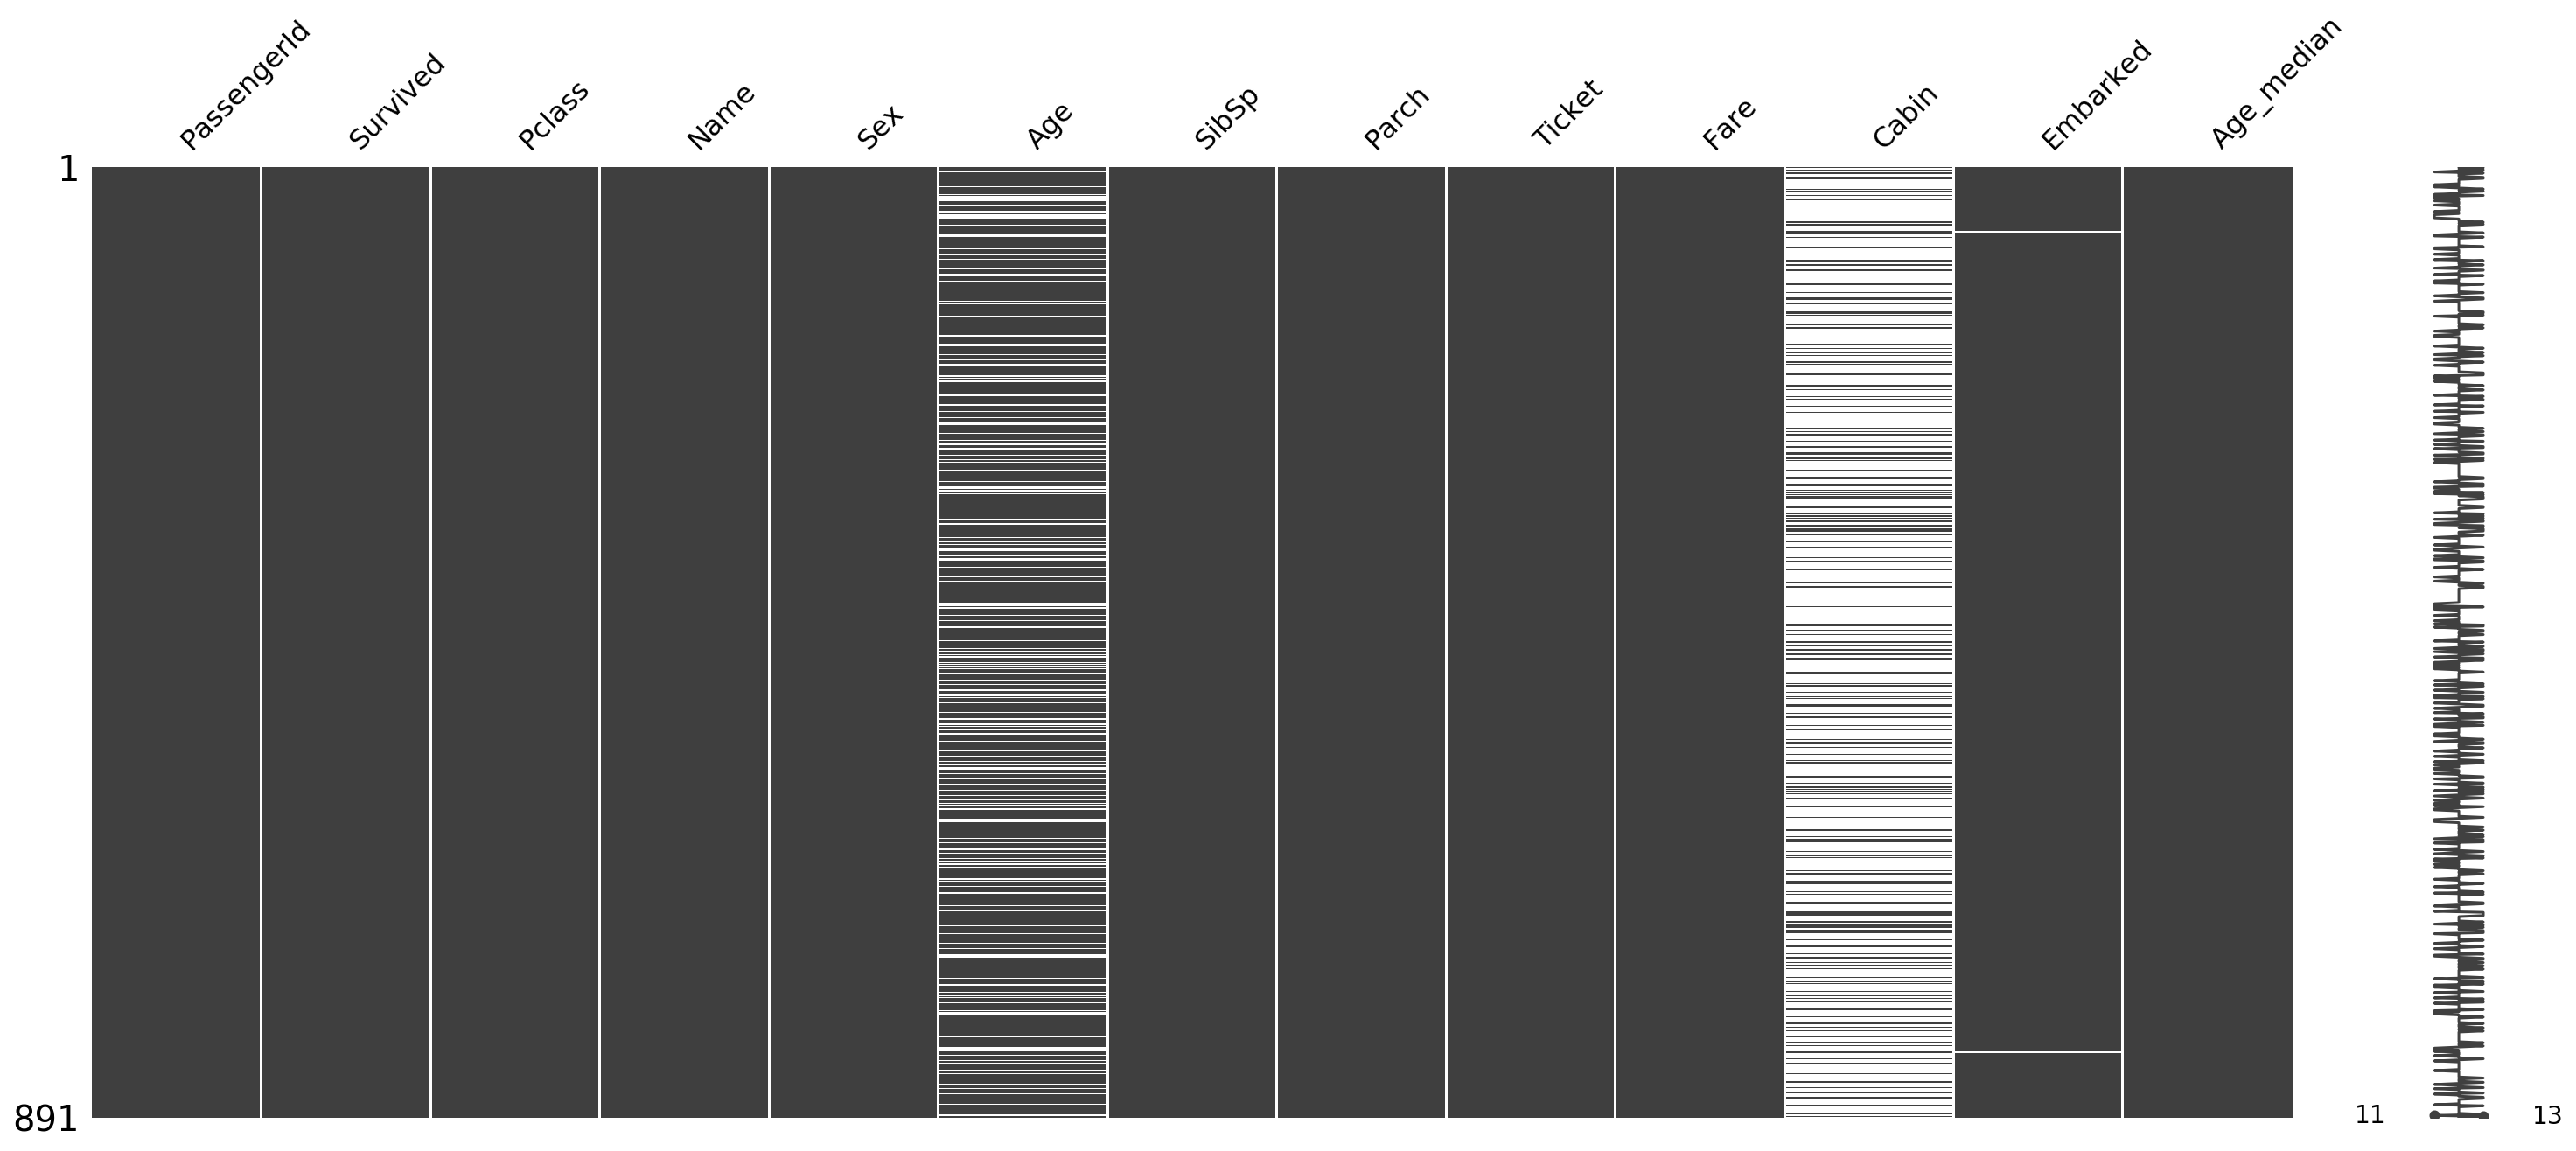

In [17]:
msno.matrix(train)

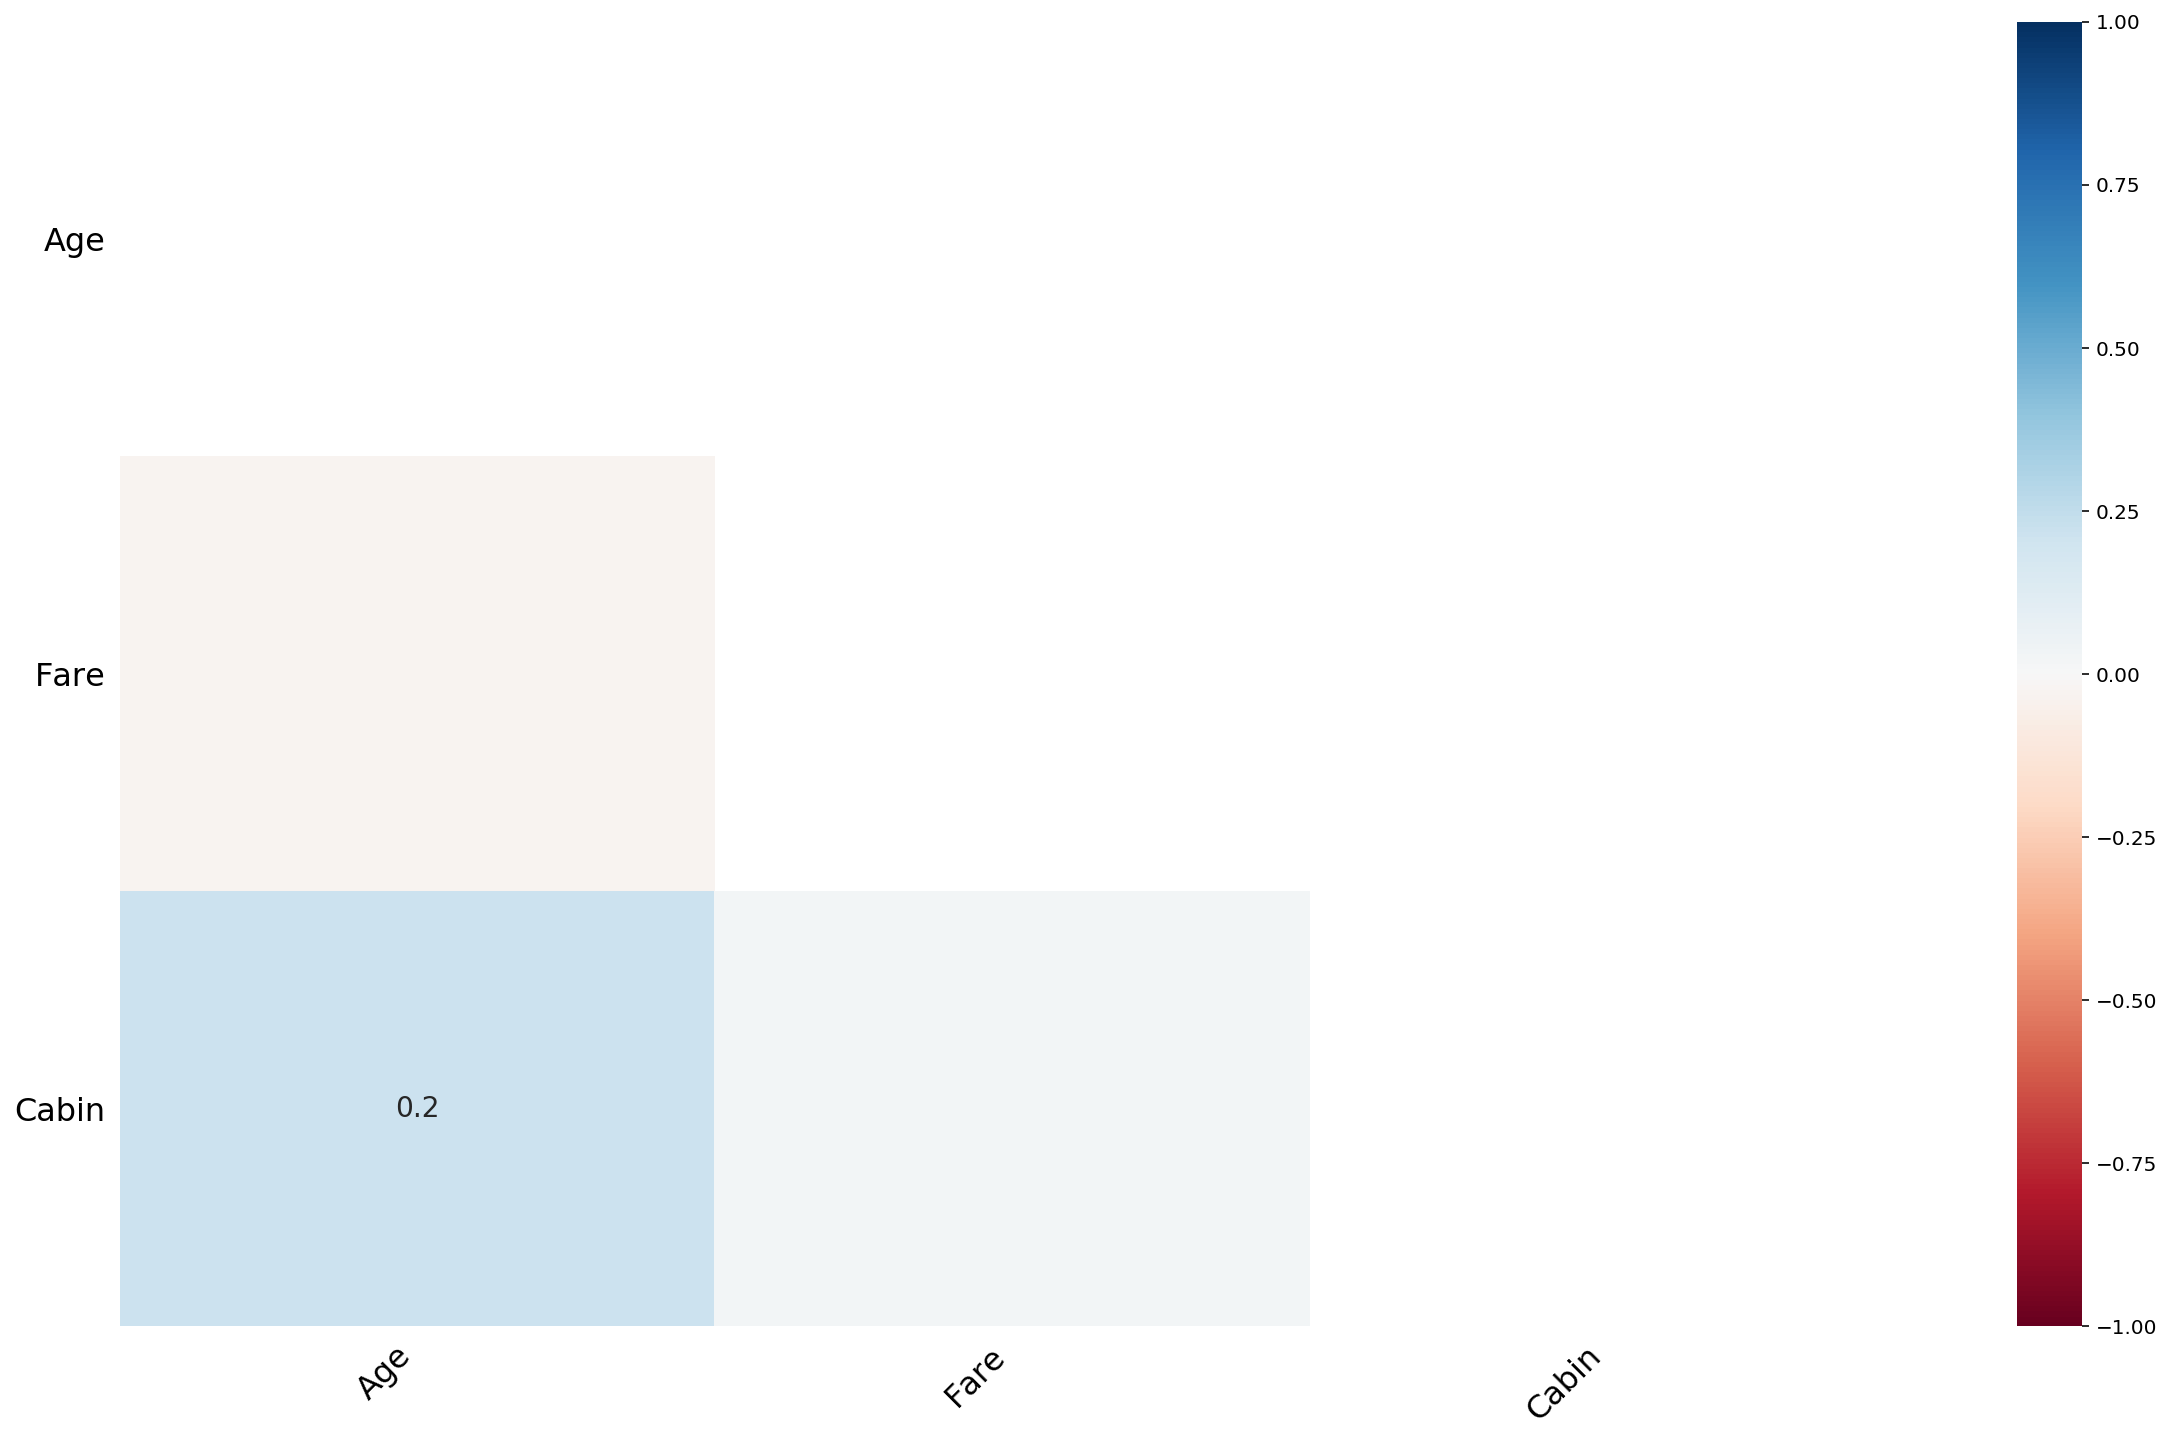

In [18]:
msno.heatmap(test)

### one-hot encoding : Sex, Embarked

#### Sex -> Gender

In [19]:
print(train.Sex.isnull().sum())
train['Sex'].value_counts()

0


male      577
female    314
Name: Sex, dtype: int64

In [20]:
train['Gender'] = train['Sex']
train.loc[train['Gender'] == 'female', 'Gender'] = 1
train.loc[train['Gender'] == 'male', 'Gender'] = 0

In [21]:
train['Gender'].value_counts()

0    577
1    314
Name: Gender, dtype: int64

In [22]:
print(test['Sex'].isnull().sum())
print(test['Sex'].value_counts())
test['Gender'] = test['Sex']
test.loc[test['Gender'] == 'female', 'Gender'] = 1
test.loc[test['Gender'] == 'male', 'Gender'] = 0
test['Gender'].value_counts()

0
male      266
female    152
Name: Sex, dtype: int64


0    266
1    152
Name: Gender, dtype: int64

#### Embarked

In [23]:
print(train['Embarked'].isnull().sum())
train['Embarked'].value_counts()

2


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
#%pip install scipy

In [25]:
#import scipy

In [26]:
#%pip install sklearn

In [27]:
#import sklearn

In [28]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder()
# enc.fit(Y_class)

In [29]:
# onehotencoding without sklearn
train['Embarked_S'] = train['Embarked']  == 'S'
train['Embarked_C'] = train['Embarked']  == 'C'
train['Embarked_Q'] = train['Embarked']  == 'Q'

train['Embarked_S'].head()

0     True
1    False
2     True
3     True
4     True
Name: Embarked_S, dtype: bool

In [30]:
print(train['Embarked'].value_counts())
print(train['Embarked_S'].sum())
print(train['Embarked_C'].sum())
print(train['Embarked_Q'].sum())

train[['Embarked', 'Embarked_S', 'Embarked_C', 'Embarked_Q']].head()

S    644
C    168
Q     77
Name: Embarked, dtype: int64
644
168
77


,Embarked,Embarked_S,Embarked_C,Embarked_Q
0,S,True,False,False
1,C,False,True,False
2,S,True,False,False
3,S,True,False,False
4,S,True,False,False


In [31]:
print(test['Embarked'].isnull().sum())

test['Embarked_S'] = test['Embarked']  == 'S'
test['Embarked_C'] = test['Embarked']  == 'C'
test['Embarked_Q'] = test['Embarked']  == 'Q'

print(test['Embarked'].value_counts())
print(test['Embarked_S'].sum())
print(test['Embarked_C'].sum())
print(test['Embarked_Q'].sum())

test[['Embarked', 'Embarked_S', 'Embarked_C', 'Embarked_Q']].head()

0
S    270
C    102
Q     46
Name: Embarked, dtype: int64
270
102
46


,Embarked,Embarked_S,Embarked_C,Embarked_Q
0,Q,False,False,True
1,S,True,False,False
2,Q,False,False,True
3,S,True,False,False
4,S,True,False,False


### adding new feature : FamilySize, Family

#### FamilySize = SibSp + Parch

In [32]:
train[['SibSp', 'Parch']].head()

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0


In [33]:
# +1 : oneself
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [34]:
train.FamilySize.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [35]:
test.FamilySize.value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: FamilySize, dtype: int64

In [36]:
train.FamilySize.describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

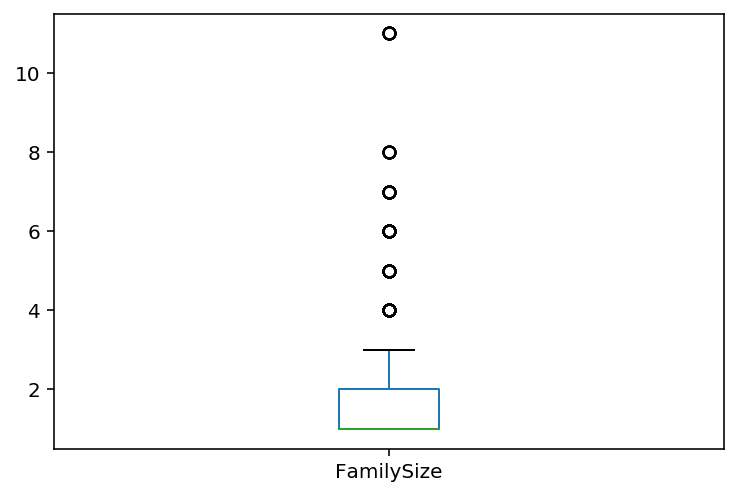

In [37]:
train.FamilySize.plot.box()

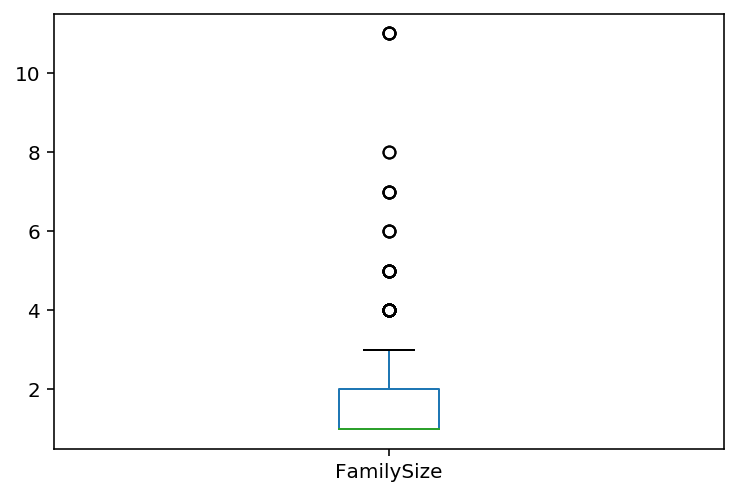

In [38]:
test['FamilySize'].plot.box()

#### Family into S, M, L : categorizing/범주화

In [39]:
train['Family'] = train['FamilySize']

train.loc[train['FamilySize'] == 1, 'Family'] = 'S'
train.loc[train['FamilySize'] > 1, 'Family'] = 'M'
train.loc[train['FamilySize'] > 4, 'Family'] = 'L'

train[['Family', 'FamilySize']].head()

,Family,FamilySize
0,M,2
1,M,2
2,S,1
3,M,2
4,S,1


In [40]:
test['Family'] = test['FamilySize']

test.loc[test['FamilySize'] == 1, 'Family'] = 'S'
test.loc[test['FamilySize'] > 1, 'Family'] = 'M'
test.loc[test['FamilySize'] > 4, 'Family'] = 'L'

test[['Family', 'FamilySize']].head()

,Family,FamilySize
0,S,1
1,M,2
2,S,1
3,S,1
4,M,3


In [41]:
train['Family_S'] = train['Family'] == 'S'
train['Family_M'] = train['Family'] == 'M'
train['Family_L'] = train['Family'] == 'L'

train[['FamilySize', 'Family', 'Family_S', 'Family_M', 'Family_L']].head()

,FamilySize,Family,Family_S,Family_M,Family_L
0,2,M,False,True,False
1,2,M,False,True,False
2,1,S,True,False,False
3,2,M,False,True,False
4,1,S,True,False,False


In [42]:
train['Family'].value_counts()

S    537
M    292
L     62
Name: Family, dtype: int64

In [43]:
test['Family_S'] = test['Family'] == 'S'
test['Family_M'] = test['Family'] == 'M'
test['Family_L'] = test['Family'] == 'L'

test[['FamilySize', 'Family', 'Family_S', 'Family_M', 'Family_L']].head()

,FamilySize,Family,Family_S,Family_M,Family_L
0,1,S,True,False,False
1,2,M,False,True,False
2,1,S,True,False,False
3,1,S,True,False,False
4,3,M,False,True,False


In [44]:
test['Family'].value_counts()

S    253
M    145
L     20
Name: Family, dtype: int64

### other features

In [45]:
train['Fare'].describe() # outliers

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [46]:
test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [47]:
train['Pclass'].value_counts() 

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [48]:
train['Pclass'] = train['Pclass'].astype('category')
train['Pclass'].dtypes

CategoricalDtype(categories=[1, 2, 3], ordered=False)

In [49]:
test['Pclass'] = test['Pclass'].astype('category')
test['Pclass'].dtypes

CategoricalDtype(categories=[1, 2, 3], ordered=False)

## Feature Selection

In [50]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_median', 'Gender',
       'Embarked_S', 'Embarked_C', 'Embarked_Q', 'FamilySize', 'Family',
       'Family_S', 'Family_M', 'Family_L'],
      dtype='object')

In [51]:
features = ['Gender', 'Age_median', 'Embarked_S', 'Embarked_C', 'Embarked_Q',
          'Family_S', 'Family_M', 'Family_L', 'Pclass']

In [52]:
X_train = train[features]
X_train.head()

,Gender,Age_median,Embarked_S,Embarked_C,Embarked_Q,Family_S,Family_M,Family_L,Pclass
0,0,22.0,True,False,False,False,True,False,3
1,1,38.0,False,True,False,False,True,False,1
2,1,26.0,True,False,False,True,False,False,3
3,1,35.0,True,False,False,False,True,False,1
4,0,35.0,True,False,False,True,False,False,3


In [53]:
y_label = train['Survived']

In [54]:
X_test = test[features]
X_test.head()

,Gender,Age_median,Embarked_S,Embarked_C,Embarked_Q,Family_S,Family_M,Family_L,Pclass
0,0,34.5,False,False,True,True,False,False,3
1,1,47.0,True,False,False,False,True,False,3
2,0,62.0,False,False,True,True,False,False,2
3,0,27.0,True,False,False,True,False,False,3
4,1,22.0,True,False,False,False,True,False,3


## Modelling

In [55]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, random_state=2020)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2020, splitter='best')

In [56]:
model.fit(X_train, y_label)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2020, splitter='best')

In [59]:
# from sklearn.model_selection import KFold, corss_val_score
from sklearn.model_selection import KFold, cross_validate

k_fold = KFold(n_splits=10, shuffle=True, random_state=2020)

In [64]:
scoring = 'accuracy' # or other?
score = cross_validate(model, X_train, y_label, cv=k_fold, n_jobs=-1, scoring=scoring)['test_score']
print(score)

[0.88888889 0.70786517 0.85393258 0.80898876 0.76404494 0.82022472
 0.85393258 0.85393258 0.83146067 0.84269663]


In [65]:
round(np.mean(score)*100, 2)

82.26

In [68]:
prediction = model.predict(X_test)
prediction.shape

(418,)

In [69]:
test['Survived'] = prediction

In [70]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_median', 'Gender',
       'Embarked_S', 'Embarked_C', 'Embarked_Q', 'FamilySize', 'Family',
       'Family_S', 'Family_M', 'Family_L', 'Survived'],
      dtype='object')

In [71]:
submissions = test[['PassengerId', 'Survived']]
submissions.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [73]:
submissions.to_csv('./data/submission3.csv', index=False)

### Visualizing tree with graphviz

In [ ]:
# %pip install graphviz

In [79]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

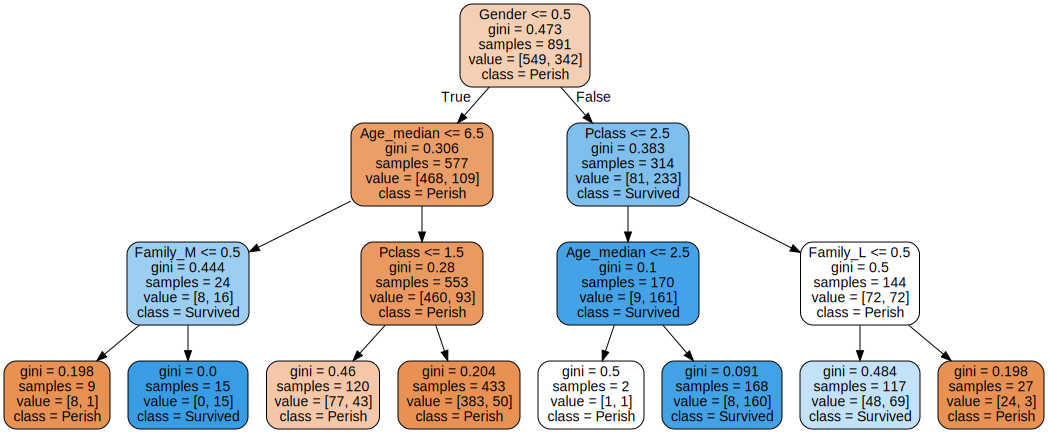

In [83]:
from sklearn.tree import export_graphviz
import graphviz 

dot_tree = export_graphviz(model, feature_names = features, class_names=['Perish', 'Survived'], 
                           filled=True, rounded=True) # , out_filled='decision-tree-dot')
graphviz.Source(dot_tree)

In [84]:
# export_graphviz(model, feature_names=features, class_names=['Perish', 'Survived'], 
#                 filled=True, rounded=True) # , out_filled='decision-tree-dot'

# with open('decision-tree-dot') as f:
#     dot_graph = f.read()
    
# graphviz.Source(dot_graph)